<a href="https://colab.research.google.com/github/neerajac19/Hotel-Booking-Analysis-EDA/blob/main/Hotel_Booking_Analysis_EDA_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

### **Load data into the dataframe**



In [ ]:
# Mount your drive and read the csv file. Make sure you are using the correct file path
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
file_path ="/content/drive/MyDrive/Colab Notebooks/Module1/Capstone Project/Copy of Hotel Bookings.csv"

In [ ]:
#reading file path
df=pd.read_csv(file_path)

In [ ]:
#counting number of data
df.shape

(119390, 32)

In [ ]:
# Taking a look to data
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
#Info about the columns
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
#calculating number of duplicated rows
duplicate_rows_df=df[df.duplicated()]
print("Number of duplicated rows:",duplicate_rows_df.shape)

Number of duplicated rows: (31994, 32)


In [ ]:
#Droping duplicated rows
df=df.drop_duplicates()


In [ ]:
#count number of records
df.shape

(87396, 32)

In [ ]:
# Columns having missing values.
df.isnull().sum().sort_values(ascending = False)

company                           82137
agent                             12193
country                             452
children                              4
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
hotel                                 0
previous_cancellations                0
days_in_waiting_list                  0
customer_type                         0
adr                                   0
required_car_parking_spaces           0
total_of_special_requests             0
reservation_status                    0
previous_bookings_not_canceled        0
is_repeated_guest                     0
is_canceled                           0
distribution_channel                  0
market_segment                        0
meal                                  0
babies                                0
adults                                0
stays_in_week_nights                  0


In [ ]:
#Replacing null values with zeroes
df[['company','agent']] = df[['company','agent']].fillna(0)

In [ ]:
df['children'].unique()

array([ 0.,  1.,  2., 10.,  3., nan])

In [ ]:
df['children'].fillna(df['children'].mean(), inplace = True)

In [ ]:
df['country'].fillna('others', inplace = True)

In [ ]:
# Checking if all null values are removed
df.isnull().sum().sort_values(ascending = False)

hotel                             0
is_canceled                       0
reservation_status                0
total_of_special_requests         0
required_car_parking_spaces       0
adr                               0
customer_type                     0
days_in_waiting_list              0
company                           0
agent                             0
deposit_type                      0
booking_changes                   0
assigned_room_type                0
reserved_room_type                0
previous_bookings_not_canceled    0
previous_cancellations            0
is_repeated_guest                 0
distribution_channel              0
market_segment                    0
country                           0
meal                              0
babies                            0
children                          0
adults                            0
stays_in_week_nights              0
stays_in_weekend_nights           0
arrival_date_day_of_month         0
arrival_date_week_number    

In [ ]:
# Rows with total number of adults, children or babies equal to zero
df[df['adults']+df['babies']+df['children'] == 0].shape

(166, 32)

In [ ]:
#Removing rows with adults, children or babies equal to zero
df.drop(df[df['adults']+df['babies']+df['children'] == 0].index, inplace = True)

In [ ]:
# Converting datatype of columns 'children', 'company', 'agent' , 'adr' from float to int.
df[['children', 'company', 'agent' , 'adr']] = df[['children', 'company', 'agent', 'adr']].astype('int64')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87396 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   hotel                           87396 non-null  object
 1   is_canceled                     87396 non-null  int64 
 2   lead_time                       87396 non-null  int64 
 3   arrival_date_year               87396 non-null  int64 
 4   arrival_date_month              87396 non-null  object
 5   arrival_date_week_number        87396 non-null  int64 
 6   arrival_date_day_of_month       87396 non-null  int64 
 7   stays_in_weekend_nights         87396 non-null  int64 
 8   stays_in_week_nights            87396 non-null  int64 
 9   adults                          87396 non-null  int64 
 10  children                        87396 non-null  int64 
 11  babies                          87396 non-null  int64 
 12  meal                            87396 non-nul

In [ ]:
df['hotel'].agg(['value_counts'])

,value_counts
City Hotel,53274
Resort Hotel,33956


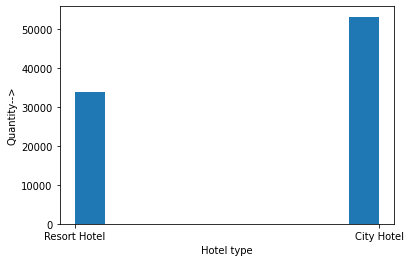

In [ ]:
plt.hist(df['hotel'])
plt.xlabel('Hotel type')
plt.ylabel('Quantity-->')
plt.show()

Text(0.5, 1.0, 'Pie Chart for Most Preffered  Hotel')

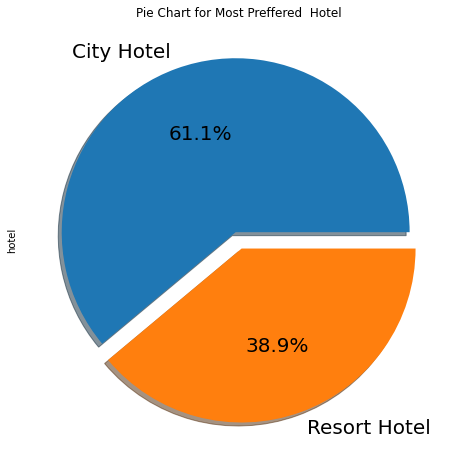

In [ ]:
df['hotel'].value_counts().plot.pie(explode=[0.05, 0.05], autopct='%1.1f%%', shadow=True, figsize=(10,8),fontsize=20)   
plt.title('Pie Chart for Most Preffered  Hotel')

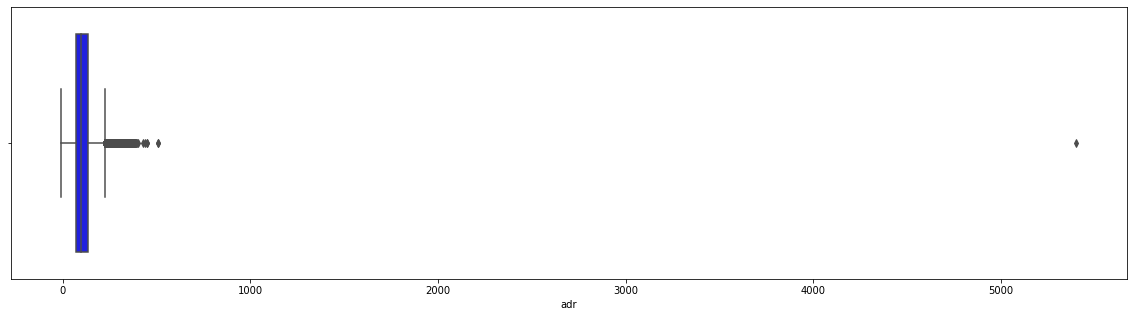

In [ ]:
plt.figure(figsize=(20,5))
sns.boxplot(x=df['adr'],color='Blue')

In [ ]:
#Removed an extreme outlier
df_new=df.drop(df[df['adr']==5400].index,axis=0,inplace=False)

Which is the most busiest month

In [ ]:
df.groupby('hotel')['arrival_date_month'].value_counts()

hotel         arrival_date_month
City Hotel    August                6576
              July                  5730
              May                   5402
              April                 5072
              June                  4997
              March                 4833
              September             4232
              October               4197
              February              3591
              December              2998
              November              2922
              January               2724
Resort Hotel  August                4666
              July                  4313
              May                   2942
              April                 2828
              June                  2759
              October               2724
              March                 2656
              February              2492
              September             2450
              December              2114
              November              2051
              January   

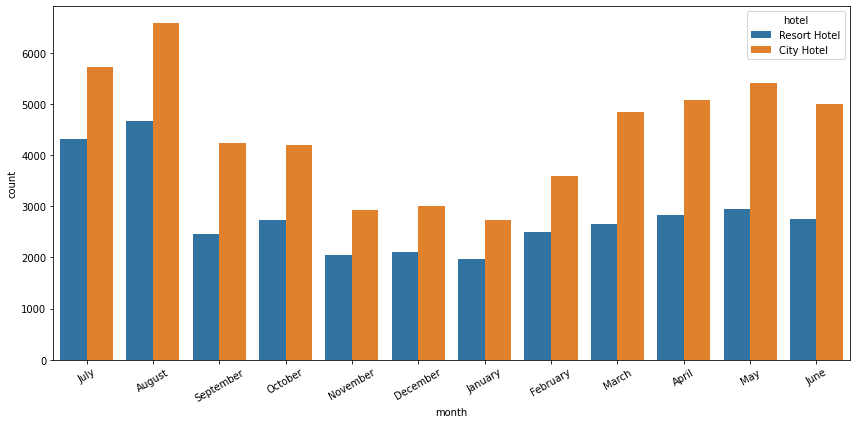

In [ ]:
plt.rcParams['figure.figsize']=(12,6)
mn=sns.countplot(x='arrival_date_month',hue='hotel',data=df)
mn.set(xlabel='month',ylabel='count')
p=plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

Comparision of Hotels

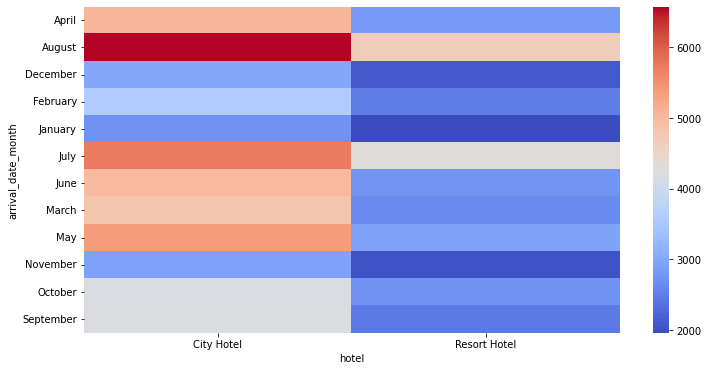

In [ ]:
sns.heatmap(pd.crosstab(df.arrival_date_month,df.hotel),cmap='coolwarm')

Stays by users

In [ ]:
#adding new column [total_nights]
df['total_nights']=df['stays_in_weekend_nights']+df['stays_in_week_nights']

In [ ]:
df[['total_nights']]

,total_nights
0,0
1,0
2,1
3,1
4,2
...,...
119385,7
119386,7
119387,7
119388,7


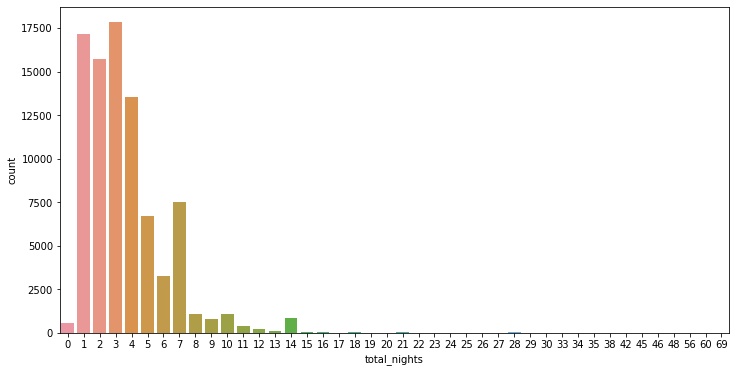

In [ ]:
sns.countplot(x='total_nights',data=df)

In [ ]:
stay_days = df.groupby(['total_nights', 'hotel']).agg('count').reset_index()   # group by total stay and hotel
stay_days = stay_days.iloc[:, :3]                                                   # take 1st 3 columns
stay_days = stay_days.rename(columns={'is_canceled':'Number of stays'})    # rename the columns
stay_days

,total_nights,hotel,Number of stays
0,0,City Hotel,231
1,0,Resort Hotel,360
2,1,City Hotel,10270
3,1,Resort Hotel,6899
4,2,City Hotel,10813
...,...,...,...
68,46,Resort Hotel,1
69,48,City Hotel,1
70,56,Resort Hotel,2
71,60,Resort Hotel,1


Text(0.5, 0, 'total_stay in days')

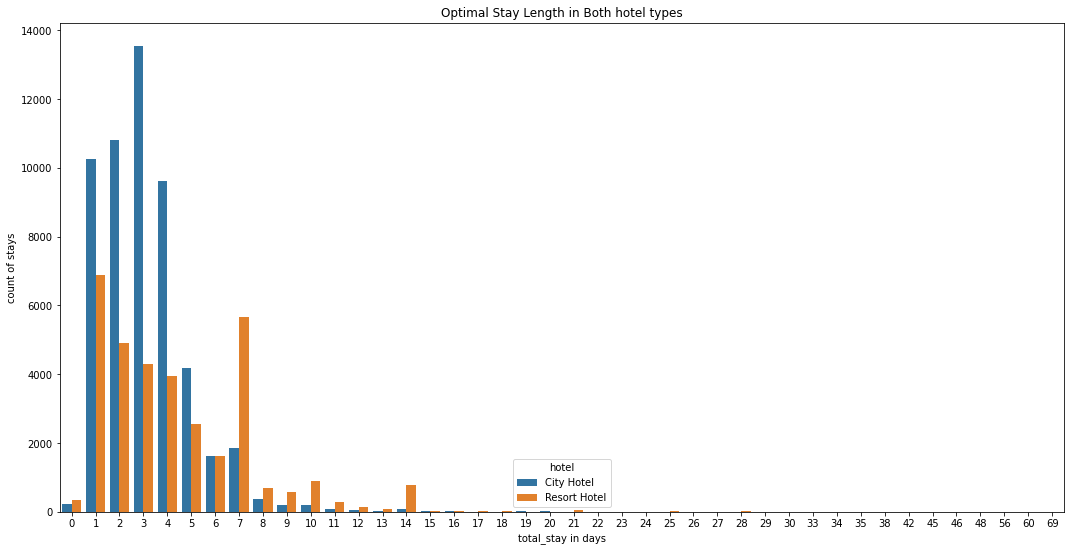

In [ ]:
# set plot size and plot barchart
plt.figure(figsize=(18,9))
sns.barplot(x='total_nights',y='Number of stays',hue='hotel',data=stay_days)

#set labels
plt.title('Optimal Stay Length in Both hotel types')
plt.ylabel('count of stays')
plt.xlabel('total_stay in days')

From where the most guests coming

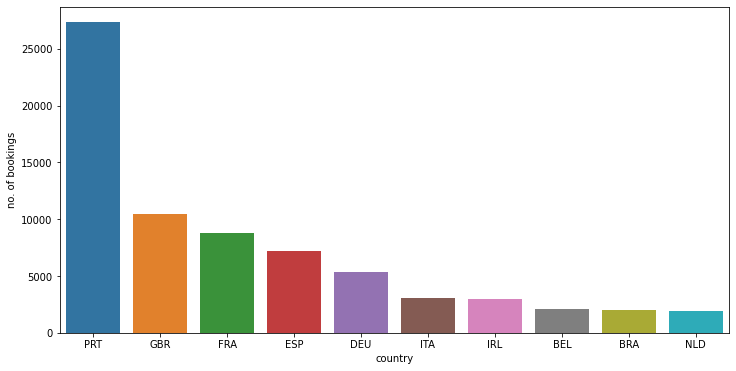

In [ ]:
#Number of bookings of each country
grp_by_country = df.groupby('country')
d2 = pd.DataFrame(grp_by_country.size()).rename(columns = {0:'no. of bookings'}).sort_values('no. of bookings', ascending = False)
d2 = d2[:10]
sns.barplot(x = d2.index, y = d2['no. of bookings'])
plt.show()


Effect of lead time on cancellation

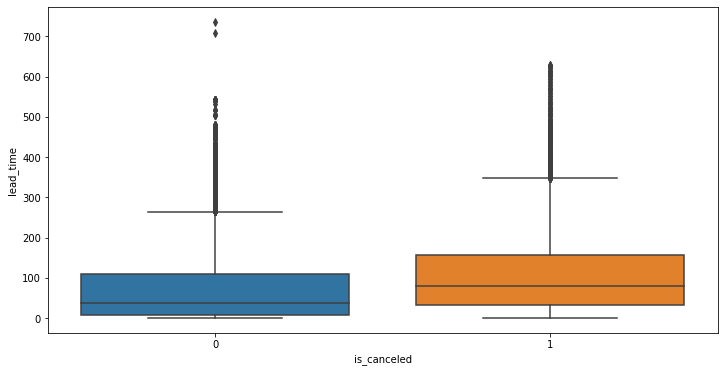

In [ ]:
df2=df[df['is_canceled']=='Yes']
sns.boxplot(x='is_canceled',y='lead_time',data=df)

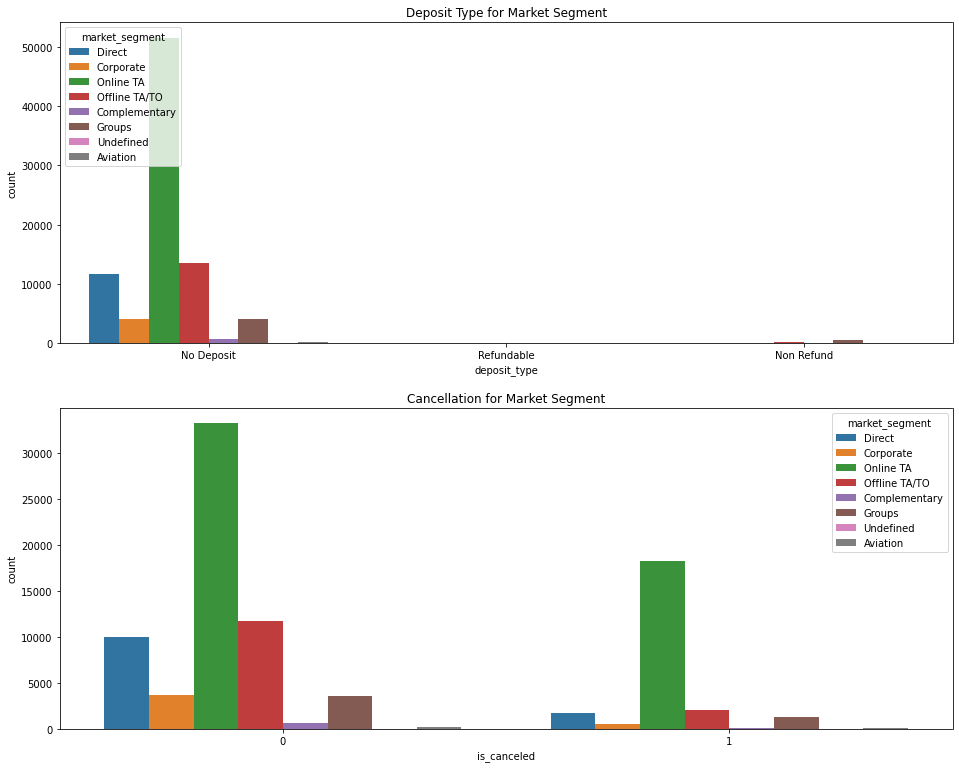

In [ ]:
plt.figure(figsize=(16,13))
plt.subplot(211)
sns.countplot(data= df,x='deposit_type',  hue='market_segment')
plt.title('Deposit Type for Market Segment')

plt.subplot(212)
sns.countplot(data= df,x='is_canceled',hue='market_segment')
plt.title('Cancellation for Market Segment')
plt.show()

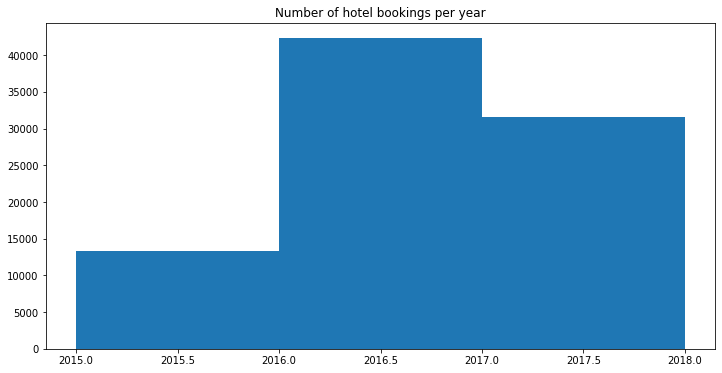

In [ ]:
#Number of bookings over time
plt.title("Number of hotel bookings per year")
plt.hist(df.arrival_date_year, bins=np.arange(2015, 2019,1));

Special Requests

In [ ]:
df.total_of_special_requests.value_counts(normalize=True)*100

0    50.199473
1    33.217930
2    13.521724
3     2.652757
4     0.366846
5     0.041270
Name: total_of_special_requests, dtype: float64

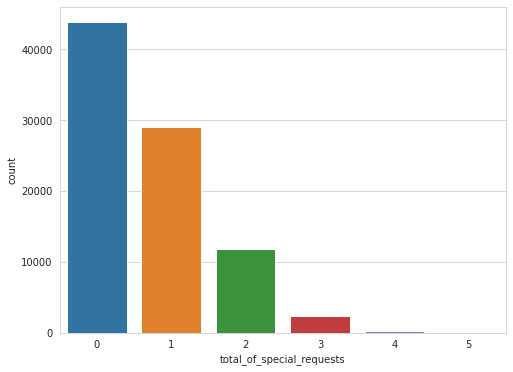

In [ ]:
plt.figure(figsize=(8,6))
sns.set_style('whitegrid')
sns.countplot(x='total_of_special_requests',data=df)
plt.show()

AVERAGE NUMBER OF SPECIAL REQUESTS BY CUSTOMER TYPE

Text(0, 0.5, 'Average number of special request')

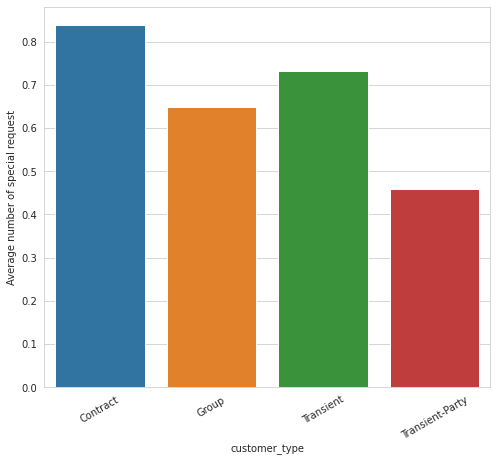

In [ ]:
df3=df.groupby('customer_type')['total_of_special_requests'].mean()
plt.figure(figsize=(8,7))
sns.barplot(x=df3.index,y=df3)
p=plt.xticks(rotation=30)
plt.xlabel('customer_type')
plt.ylabel('Average number of special request')



Which distribution channel is mostly prefered

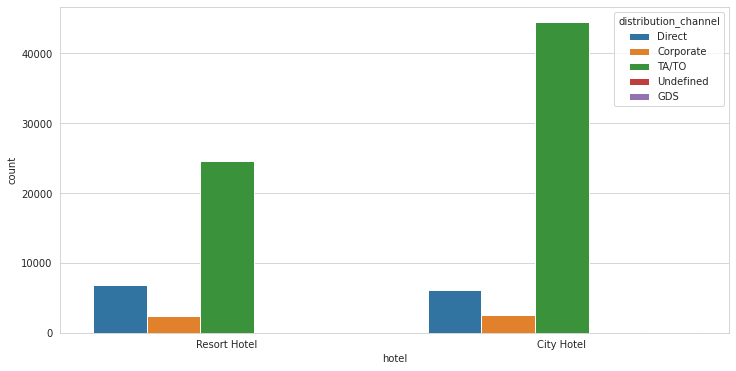

In [ ]:
df.groupby(['hotel'])['distribution_channel'].agg('value_counts')
sns.countplot(x='hotel',hue='distribution_channel',data=df)

ADR RELATION WITH DISTRIBUTION CHANNEL

Text(0.5, 1.0, 'ADR for Distribution channel')

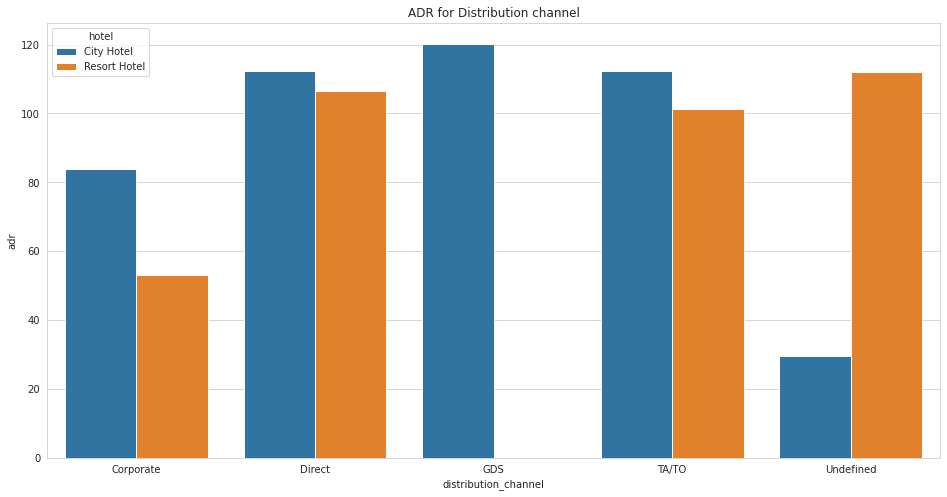

In [ ]:
# group by distribution channel and hotel
distribution_channel_df=df.groupby(['distribution_channel','hotel'])['adr'].mean().reset_index()

# set plot size and plot barchart
plt.figure(figsize=(16,8))
sns.barplot(x='distribution_channel', y='adr', data=distribution_channel_df, hue='hotel')
plt.title('ADR for Distribution channel')